## Data Ingestion and Preprocessing

In [73]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Loading airbnb data of 8 cities
montreal = pd.read_csv('Dataset/Airbnb/Montreal.csv')
newbrunswick = pd.read_csv('Dataset/Airbnb/NewBrunswick.csv')
ottawa = pd.read_csv('Dataset/Airbnb/Ottawa.csv')
quebeccity = pd.read_csv('Dataset/Airbnb/QuebecCity.csv')
toronto = pd.read_csv('Dataset/Airbnb/Toronto.csv')
vancouver = pd.read_csv('Dataset/Airbnb/Vancouver.csv')
victoria = pd.read_csv('Dataset/Airbnb/Victoria.csv')
winnipeg = pd.read_csv('Dataset/Airbnb/Winnipeg.csv')


# Adding a City column to each dataframes
montreal['City'] = 'Montreal'
newbrunswick['City'] = 'New Brunswick'
ottawa['City'] = 'Ottawa'
quebeccity['City'] = 'Quebec City'
toronto['City'] = 'Toronto'
vancouver['City'] = 'Vancouver'
victoria['City'] = 'Victoria'
winnipeg['City'] = 'Winnipeg'

# Merging data from different cities to a single dataframe
airbnb_df = pd.concat([montreal, newbrunswick, ottawa, quebeccity, toronto, vancouver, victoria, winnipeg], ignore_index=True)

In [75]:
airbnb_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.963600e+04,4.963600e+04,4.963600e+04,49634.000000,49634.000000,49636.000000,49636.000000,49636.000000,41614.000000,47525.000000,...,39411.000000,39409.000000,39410.000000,39408.000000,39408.000000,49636.000000,49636.000000,49636.000000,49636.000000,39455.000000
mean,4.951017e+17,2.024044e+13,2.105296e+08,11.428295,17.965447,45.707282,-86.409358,3.524438,1.285108,1.579611,...,4.761674,4.858577,4.865958,4.818533,4.702363,7.261181,5.442683,1.745890,0.045350,1.565113
std,4.590541e+17,8.492157e+07,1.879092e+08,38.390107,62.737442,2.160301,19.477610,2.267403,0.691533,1.035723,...,0.385802,0.313433,0.314090,0.285152,0.393191,16.049818,14.697855,6.346418,0.750822,1.860575
min,1.419000e+03,2.024032e+13,1.565000e+03,1.000000,1.000000,43.585750,-124.421850,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.509048e+07,2.024032e+13,3.825061e+07,1.000000,1.000000,43.674331,-79.558415,2.000000,1.000000,1.000000,...,4.690000,4.840000,4.860000,4.750000,4.630000,1.000000,1.000000,0.000000,0.000000,0.290000
50%,6.506540e+17,2.024050e+13,1.482152e+08,2.000000,3.000000,45.464161,-79.387940,3.000000,1.000000,1.000000,...,4.880000,4.950000,4.960000,4.900000,4.800000,2.000000,1.000000,0.000000,0.000000,0.900000
75%,9.335297e+17,2.024051e+13,3.899223e+08,6.000000,9.000000,47.364125,-73.606614,4.000000,1.500000,2.000000,...,5.000000,5.000000,5.000000,5.000000,4.930000,5.000000,2.000000,1.000000,0.000000,2.250000
max,1.151772e+18,2.024051e+13,5.764085e+08,692.000000,2046.000000,49.973760,-63.775060,16.000000,46.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,123.000000,123.000000,92.000000,24.000000,57.170000


In [76]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49636 entries, 0 to 49635
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            49636 non-null  int64  
 1   listing_url                                   49636 non-null  object 
 2   scrape_id                                     49636 non-null  int64  
 3   last_scraped                                  49636 non-null  object 
 4   source                                        49636 non-null  object 
 5   name                                          49636 non-null  object 
 6   description                                   48752 non-null  object 
 7   neighborhood_overview                         27492 non-null  object 
 8   picture_url                                   49636 non-null  object 
 9   host_id                                       49636 non-null 

In [77]:
airbnb_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,29059,https://www.airbnb.com/rooms/29059,20240323015116,2024-03-23,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.82,4.68,"267153, expires: 2024-03-31",f,2,2,0,0,2.69,Montreal
1,29061,https://www.airbnb.com/rooms/29061,20240323015116,2024-03-23,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.87,4.73,"267153, expires: 2024-03-31",f,2,2,0,0,0.88,Montreal
2,36301,https://www.airbnb.com/rooms/36301,20240323015116,2024-03-23,city scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.88,4.76,NaN,f,3,3,0,0,0.47,Montreal
3,38118,https://www.airbnb.com/rooms/38118,20240323015116,2024-03-23,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.63,4.38,NaN,f,1,0,1,0,0.10,Montreal
4,50479,https://www.airbnb.com/rooms/50479,20240323015116,2024-03-23,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/miso/Hosting-...,231694,...,4.84,4.93,"271530, expires: 2024-04-30",t,2,1,1,0,1.60,Montreal


In [78]:
airbnb_df.isnull().sum().sort_values(ascending=False)

calendar_updated                49636
neighbourhood_group_cleansed    41746
host_neighbourhood              28125
license                         27612
host_about                      25466
                                ...  
minimum_minimum_nights              0
maximum_minimum_nights              0
minimum_maximum_nights              0
maximum_maximum_nights              0
City                                0
Length: 76, dtype: int64

In [79]:
airbnb_df['price'] = airbnb_df['price'].str.replace('[$,]', '', regex=True).astype(float)

The prices for the listings in the dataset are greatly skewed to the right as shown below. This causes a non-linear relationship between the price and features.

<Axes: >

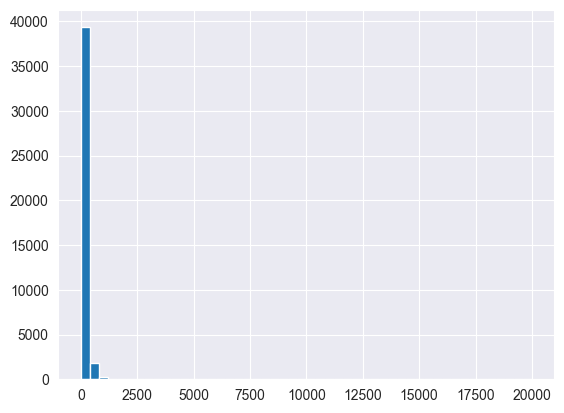

In [80]:
airbnb_df['price'].hist(bins=50)

We take the natural logarithm of the price to make the effective relationship non-linear, while still preserving the linear model. This will be very important when testing different regression models. The results of this are shown below.

<Axes: >

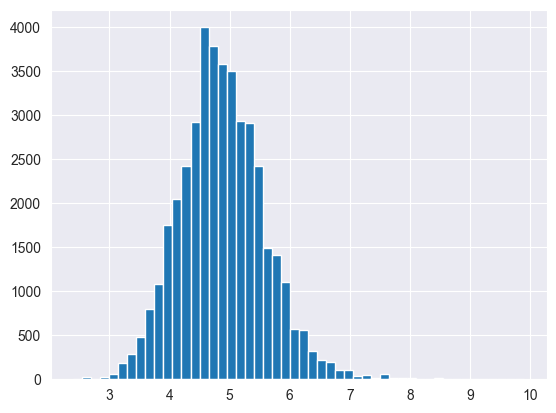

In [81]:
airbnb_df['price'] = np.log(airbnb_df['price'])

airbnb_df['price'].hist(bins=50)

## Data Preprocessing

#### Initial Feature Elimination

In [82]:
airbnb_df = airbnb_df.drop_duplicates()

First, we manually eliminated some features that were unnecessary. The features removed were id, listing_url, scrape_id, last_scraped, source, picture_url, host_id, host_url, host_thumbnail_url, host_picture_url, calendar_updated, and calendar_last_scraped.

In [83]:
airbnb_df = airbnb_df.drop(columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_id', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_updated', 'calendar_last_scraped'], axis=1)

Secondly, we eliminate many location-related columns since many of them are duplicated, and are mostly filled with null values.

In [84]:
airbnb_df = airbnb_df.drop(columns=['neighbourhood_group_cleansed', 'host_neighbourhood', 'host_location', 'neighbourhood', 'review_scores_location'], axis=1)

Thirdly, we eliminate redundant columns.

In [85]:
airbnb_df = airbnb_df.drop(columns=['bathrooms_text'], axis=1)

Finally, eliminating host about and neighbourhood about because of language challenges.

In [86]:
airbnb_df = airbnb_df.drop(columns=['host_about', 'neighborhood_overview'], axis=1)

#### Handling missing values

In [87]:
airbnb_df.isnull().sum().sort_values(ascending=False)

license                                         27612
host_response_time                              10321
host_response_rate                              10321
review_scores_value                             10228
review_scores_checkin                           10227
review_scores_communication                     10226
review_scores_accuracy                          10226
review_scores_cleanliness                       10225
last_review                                     10181
first_review                                    10181
reviews_per_month                               10181
review_scores_rating                            10179
host_acceptance_rate                             8183
beds                                             8067
price                                            8064
bathrooms                                        8022
bedrooms                                         2111
has_availability                                 1339
description                 

The null in license column means that the listing doesn't have any license, so filled the column with said information.

In [88]:
airbnb_df['license'].fillna('Unlicensed', inplace=True)

Using K-nn to fill the floating point null values in the dataset since it suitable when the missing data exhibits the “Missing Completely at Random” (MCAR) or “Missing at Random” (MAR) patterns. This effectively implies that causes of the missing data are unrelated to the data.

In [90]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the desired number of neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Preparing numerical float data for KNN
numerical_float_columns = airbnb_df.select_dtypes(include=[np.number, 'float']).columns.to_list()
selected_data = airbnb_df[numerical_float_columns]

# Perform k-NN imputation on the DataFrame
imputed_data = knn_imputer.fit_transform(selected_data)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numerical_float_columns)

# Display the DataFrame with filled missing values
imputed_df.head()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2.0,2.0,45.51939,-73.56482,4.0,1.0,1.0,3.0,5.099866,2.0,...,4.79,4.62,4.81,4.77,4.68,2.0,2.0,0.0,0.0,2.69
1,2.0,2.0,45.51929,-73.56493,4.0,1.0,2.0,2.0,5.855072,2.0,...,4.85,4.66,4.88,4.81,4.73,2.0,2.0,0.0,0.0,0.88
2,8.0,11.0,45.53026,-73.58413,2.0,1.0,1.0,2.0,5.164786,32.0,...,4.88,4.86,4.92,4.90,4.76,3.0,3.0,0.0,0.0,0.47
3,1.0,3.0,45.52699,-73.55840,1.0,1.0,3.0,4.0,3.912023,31.0,...,4.56,4.25,4.81,4.81,4.38,1.0,0.0,1.0,0.0,0.10
4,2.0,3.0,45.54157,-73.60737,3.0,1.0,2.0,2.0,4.499810,3.0,...,4.96,4.94,4.97,4.98,4.93,2.0,1.0,1.0,0.0,1.60


In [91]:
# Replace the original columns in airbnb_df with the imputed ones
airbnb_df[numerical_float_columns] = imputed_df

# Display the DataFrame with filled missing values
airbnb_df.head()

,name,description,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_communication,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,City
0,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,Maryline,2010-05-14,within an hour,100%,98%,f,2.0,2.0,...,4.77,4.68,"267153, expires: 2024-03-31",f,2.0,2.0,0.0,0.0,2.69,Montreal
1,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,Maryline,2010-05-14,within an hour,100%,98%,f,2.0,2.0,...,4.81,4.73,"267153, expires: 2024-03-31",f,2.0,2.0,0.0,0.0,0.88,Montreal
2,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",Sylvie,2011-02-07,within a few hours,94%,80%,t,8.0,11.0,...,4.90,4.76,Unlicensed,f,3.0,3.0,0.0,0.0,0.47,Montreal
3,Beautiful room with a balcony in front of a parc,Nearest metro Papineau.,M.,2010-07-11,within a few hours,78%,0%,f,1.0,3.0,...,4.81,4.38,Unlicensed,f,1.0,0.0,1.0,0.0,0.10,Montreal
4,L'Arcade Douce,The appartement is sunny and ideally situated ...,Noemie,2010-09-11,within an hour,100%,100%,t,2.0,3.0,...,4.98,4.93,"271530, expires: 2024-04-30",t,2.0,1.0,1.0,0.0,1.60,Montreal


Replacing null values in host_response_rate and host_response_time with median values so that it doen't impact its relation with price column and isn't affected by outlier much.

In [92]:
airbnb_df['host_response_time'].fillna(airbnb_df['host_response_time'].mode()[0], inplace=True)
airbnb_df['host_response_rate'].fillna(airbnb_df['host_response_rate'].mode()[0], inplace=True)

review_scores related features are features where having a missing value still provided valuable information. Having a missing value meant that there were no reviews for the Airbnb listing. We elected to handle this by dropping all the rows with missing values for first_review. We had to drop these rows to preserve the linearity of the relationship between review_scores_rating and price. If we gave them all a default value of something else, the relation between the data would change.

Similarly, reving rows with null values in other columns as well since the number is low, and filling them with default values may hinder the relationship with price.

In [93]:
airbnb_df = airbnb_df.dropna(subset=['first_review'])
airbnb_df = airbnb_df.dropna(subset=['host_acceptance_rate'])
airbnb_df = airbnb_df.dropna(subset=['description'])
airbnb_df = airbnb_df.dropna(subset=['host_is_superhost'])
airbnb_df = airbnb_df.dropna(subset=['has_availability'])

In [94]:
airbnb_df.isnull().sum().sort_values(ascending=False)

name                                            0
description                                     0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
has_availability                                0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
number_of_reviews_l30d                          0
first_review                                    0
last_review                                     0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0
review_scores_communication                     0
review_scores_value                             0


In [95]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33913 entries, 0 to 49620
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          33913 non-null  object 
 1   description                                   33913 non-null  object 
 2   host_name                                     33913 non-null  object 
 3   host_since                                    33913 non-null  object 
 4   host_response_time                            33913 non-null  object 
 5   host_response_rate                            33913 non-null  object 
 6   host_acceptance_rate                          33913 non-null  object 
 7   host_is_superhost                             33913 non-null  object 
 8   host_listings_count                           33913 non-null  float64
 9   host_total_listings_count                     33913 non-null  floa